![cropped-SummerWorkshop_Header.png](resources/banner.jpg)

<h1 align="center">Allen Brain Observatory Visual Behavior Neuropixels </h1> 
<h2 align="center"> SWDB 2024 - Day 1 </h2> 
<h3 align="center"> Afternoon Session </h3> 

**Databook**

The databook is your one-stop-shop for understanding the various dimensions of this dataset, the methods used, and how to access the data that you are interested in. 

You can find the pages for the Visual Behavior Ophys dataset here: https://allenswdb.github.io/physiology/ephys/visual-behavior/VB-Neuropixels.html

![vbo_databook.png](resources/databook_vbnp.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorNeuropixelsProjectCache

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"

# Outline

## VBN data structures
#### 1. VBN cache object
#### 2. "Sessions" table
#### 3. "Units" table
#### 4. Session object
#### 5. "Stimulus" table
#### 6. "Trials" table

# 1. VBN cache object

* Access to metadata tables describing the entire dataset
* Tools for downloading data (as NWB files)
* Tools for instantiating "Session" objects from NWB files

In [4]:
cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(cache_dir=data_root, use_static_cache=True)

# 2. "Sessions" table

In [5]:
sessions = cache.get_ecephys_session_table()

In [6]:
sessions.head()

,behavior_session_id,date_of_acquisition,equipment_name,session_type,mouse_id,genotype,sex,project_code,age_in_days,unit_count,probe_count,channel_count,structure_acronyms,image_set,prior_exposures_to_image_set,session_number,experience_level,prior_exposures_to_omissions,file_id,abnormal_histology,abnormal_activity
ecephys_session_id,,,,,,,,,,,,,,,,,,,,,
1044385384,1044408432,2020-08-19 14:47:08.574000+00:00,NP.1,EPHYS_1_images_G_5uL_reward,524761,wt/wt,F,NeuropixelVisualBehavior,151,2179,5,1920,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'LGv...",G,30,1,Familiar,0,870,NaN,NaN
1044594870,1044624428,2020-08-20 15:03:56.422000+00:00,NP.1,EPHYS_1_images_H_5uL_reward,524761,wt/wt,F,NeuropixelVisualBehavior,152,2103,5,1920,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",H,0,2,Novel,1,872,NaN,NaN
1047969464,1048005547,2020-09-02 14:53:14.347000+00:00,NP.1,EPHYS_1_images_G_3uL_reward,509808,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,263,2438,6,2304,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",G,62,1,Familiar,0,877,NaN,NaN
1047977240,1048009327,2020-09-02 15:15:03.733000+00:00,NP.0,EPHYS_1_images_G_3uL_reward,524925,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,NeuropixelVisualBehavior,165,1856,6,2304,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",G,51,1,Familiar,0,878,NaN,NaN
1048189115,1048221709,2020-09-03 14:16:57.913000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,509808,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,264,1925,6,2304,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0,2,Novel,1,879,NaN,NaN


## How many experimental sessions in dataset?

In [7]:
len(sessions)

103

In [8]:
sessions.genotype.value_counts()

Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt    43
wt/wt                                            38
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt    22
Name: genotype, dtype: int64

## How many units recorded per experiment?

Text(0, 0.5, '# of sessions')

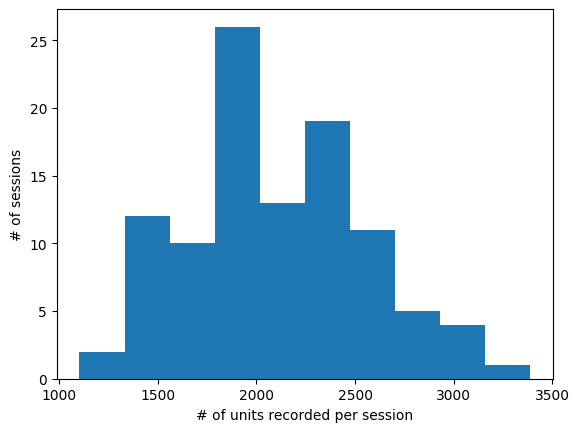

In [9]:
plt.hist(sessions.unit_count)
plt.xlabel('# of units recorded per session')
plt.ylabel('# of sessions')

# 3. "Units" table

In [10]:
units = cache.get_unit_table()

In [11]:
units.head()

,ecephys_channel_id,ecephys_probe_id,ecephys_session_id,amplitude_cutoff,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,cumulative_drift,d_prime,structure_acronym,structure_id,firing_rate,isi_violations,isolation_distance,l_ratio,local_index,max_drift,nn_hit_rate,nn_miss_rate,presence_ratio,probe_horizontal_position,probe_vertical_position,silhouette_score,snr,quality,valid_data,amplitude,waveform_duration,waveform_halfwidth,PT_ratio,recovery_slope,repolarization_slope,spread,velocity_above,velocity_below
unit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1157005856,1157001834,1046469925,1046166369,0.500000,8453.0,3353.0,6719.0,140.32,6.088133,MB,313,0.931674,0.267220,57.655071,0.000560,103,14.75,0.908333,0.000134,0.63,59.0,760.0,0.080785,3.002051,noise,True,143.066332,0.151089,0.096147,0.310791,-0.113863,0.480656,20.0,-0.457845,NaN
1157005853,1157001834,1046469925,1046166369,0.323927,8453.0,3353.0,6719.0,239.76,4.635583,MB,313,8.171978,0.006368,60.769672,0.013232,102,14.64,0.682811,0.013611,0.99,59.0,760.0,0.010255,2.072626,good,True,90.709418,0.357119,0.192295,0.531490,-0.075261,0.366371,30.0,2.060302,-2.060302
1157005720,1157001786,1046469925,1046166369,0.044133,8575.0,3842.0,6590.0,263.32,5.691955,MRN,128,13.353274,0.066996,85.246390,0.000157,47,23.86,0.992248,0.000871,0.99,27.0,280.0,0.174623,1.373454,noise,True,90.433103,0.521943,0.178559,0.612217,-0.012119,0.269843,80.0,0.000000,0.863364
1157006074,1157001929,1046469925,1046166369,0.000583,8212.0,2477.0,6992.0,154.64,6.049284,NOT,628,12.006044,0.038353,78.647572,0.000202,214,44.82,0.970760,0.000580,0.99,59.0,1680.0,0.131043,3.763084,good,True,287.492107,0.343384,0.192295,0.470194,-0.178335,1.129324,40.0,1.373534,0.000000
1157006072,1157001929,1046469925,1046166369,0.500000,8212.0,2477.0,6992.0,242.58,4.745499,NOT,628,6.058306,0.073730,65.869326,0.000538,213,13.36,0.933333,0.000169,0.99,59.0,1680.0,0.065460,2.184721,good,True,157.897057,0.329648,0.164824,0.488276,-0.105005,0.660135,70.0,0.412060,0.343384


## How many units are in dataset?

In [12]:
units.shape

(319013, 35)

In [13]:
# Select 'good' quality units
units = units[units.quality=='good']

In [14]:
units.shape

(262177, 35)

## Which brain regions are recorded?

In [15]:
regions = units.structure_acronym.value_counts()
regions

CA1      32117
APN      18834
VISp     18637
VISpm    17577
VISl     17000
         ...  
ICe          7
SCsg         6
SCzo         4
RSPd         3
CA2          3
Name: structure_acronym, Length: 63, dtype: int64

Text(0, 0.5, '# of units')

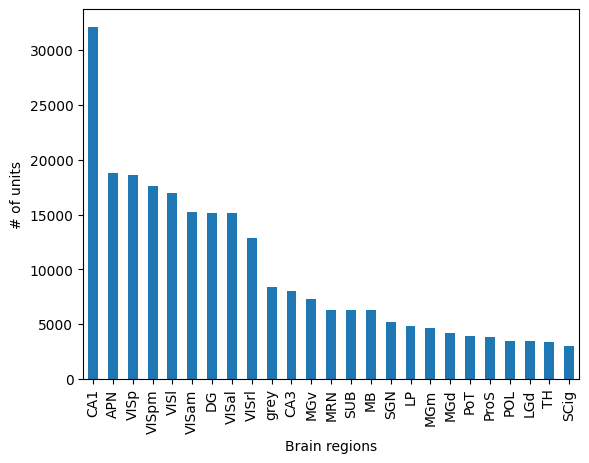

In [16]:
regions[:25].plot.bar()
plt.xlabel('Brain regions')
plt.ylabel('# of units')

## Select units in visual cortex

In [17]:
v_units = units[units.structure_acronym.str.contains('VIS')]   
v_units.shape

(97309, 35)

## Select Broad and Narrow spiking units
#### aka Regular and Fast spiking units

Text(0, 0.5, '# of units in visual cortex')

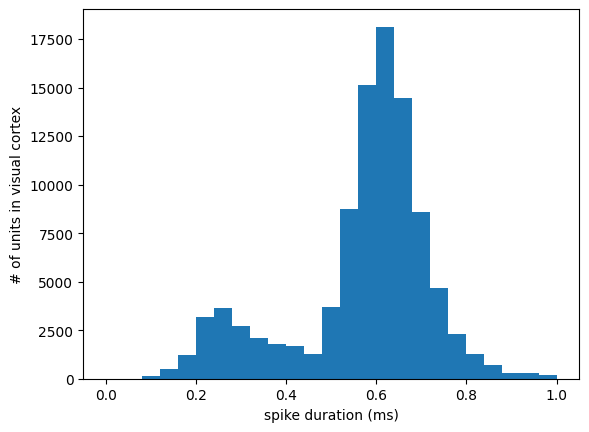

In [18]:
plt.hist(v_units.waveform_duration,bins=25,range=(0,1));

plt.xlabel("spike duration (ms)")
plt.ylabel("# of units in visual cortex")

In [19]:
fast_spiking_units = v_units[v_units.waveform_duration < 0.4]

Text(0, 0.5, '# of units in visual cortex')

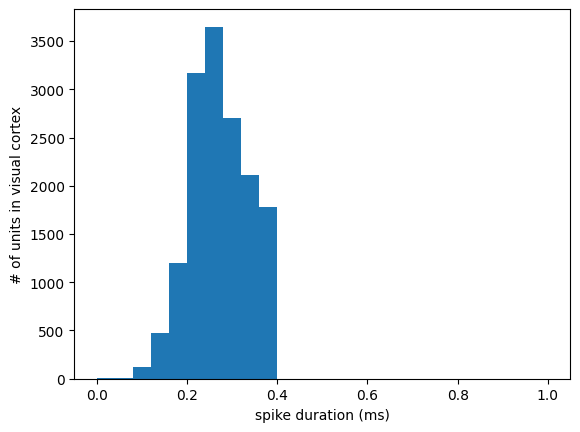

In [20]:
plt.hist(fast_spiking_units.waveform_duration,bins=25,range=(0,1));

plt.xlabel("spike duration (ms)")
plt.ylabel("# of units in visual cortex")

# . . . 

# 4. "Session" object: data from single experiment

In [21]:
session_id = 1053941483

In [22]:
session = cache.get_ecephys_session(session_id)

## Get units table for this one session

In [23]:
units = session.get_units()
units.head(2)

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,local_index,max_drift,nn_hit_rate,nn_miss_rate,peak_channel_id,presence_ratio,quality,recovery_slope,repolarization_slope,silhouette_score,snr,spread,velocity_above,velocity_below,waveform_duration
id,,,,,,,,,,,,,,,,,,,,,,,,,
1061853767,0.738222,316.197083,0.000008,23,79.63,10.843623,68.687706,0.000167,246.203332,3.104812e-08,23,37.32,1.000000,0.000000,1061851399,0.99,good,-0.404348,1.397716,0.113092,4.519657,60.0,0.686767,0.137353,0.20603
1061853941,0.490965,103.995255,0.273518,196,347.89,3.966892,1.747814,0.374140,60.672055,3.726235e-03,190,20.28,0.894994,0.001816,1061851668,0.99,good,-0.056305,0.309332,0.099188,2.541619,70.0,0.480737,0.206030,0.61809


In [24]:
# Get channels table -- this tells us the location of every electrode channel
channels = session.get_channels()
channels.head(2)

,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,filtering,left_right_ccf_coordinate,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,structure_acronym
id,,,,,,,,,
1061851368,8315.0,4024.0,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,6882.0,0,43,1054059289,20,APN
1061851369,8313.0,4014.0,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,6886.0,1,11,1054059289,20,APN


In [25]:
# Merge channels table into units table using 
units = units.merge(channels, left_on='peak_channel_id', right_index=True)
units.head(2)

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,local_index,max_drift,nn_hit_rate,nn_miss_rate,peak_channel_id,presence_ratio,quality,recovery_slope,repolarization_slope,silhouette_score,snr,spread,velocity_above,velocity_below,waveform_duration,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,filtering,left_right_ccf_coordinate,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,structure_acronym
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1061853767,0.738222,316.197083,0.000008,23,79.63,10.843623,68.687706,0.000167,246.203332,3.104812e-08,23,37.32,1.000000,0.000000,1061851399,0.99,good,-0.404348,1.397716,0.113092,4.519657,60.0,0.686767,0.137353,0.20603,8254.0,3707.0,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,6982.0,30,59,1054059289,320,APN
1061853941,0.490965,103.995255,0.273518,196,347.89,3.966892,1.747814,0.374140,60.672055,3.726235e-03,190,20.28,0.894994,0.001816,1061851668,0.99,good,-0.056305,0.309332,0.099188,2.541619,70.0,0.480737,0.206030,0.61809,7607.0,615.0,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,7642.0,294,59,1054059289,2960,VISam


In [26]:
# Select units that are in visual cortex
v_units = units[units.structure_acronym.str.contains('VIS')]

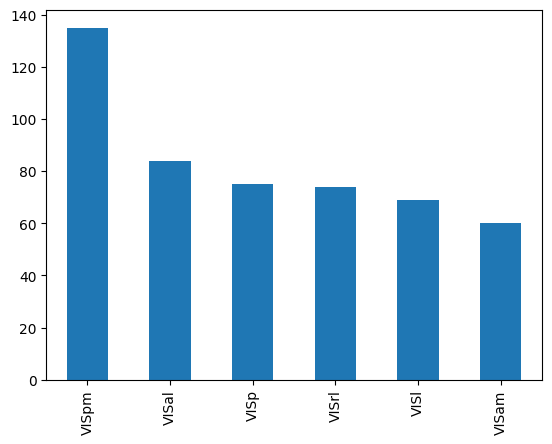

In [27]:
v_units.structure_acronym.value_counts().plot.bar();

## Make raster plot of one unit's spike train

In [28]:
# Example unit
example_unit_id = v_units.index[27]
example_unit_id

1061853935

In [29]:
# Get spike times for example unit
example_unit_spike_times = session.spike_times[example_unit_id]
example_unit_spike_times.shape

(96387,)

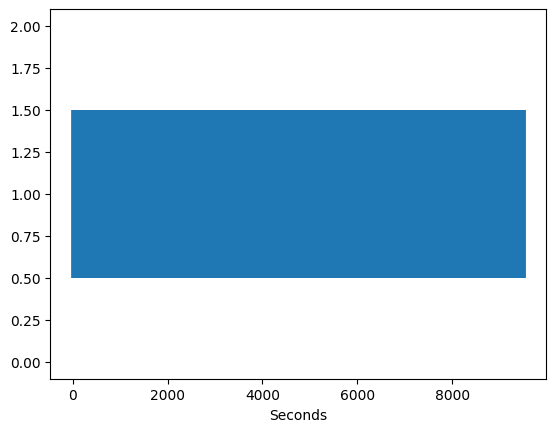

In [30]:
# Plot raster
plt.eventplot(example_unit_spike_times)
plt.xlabel('Seconds');

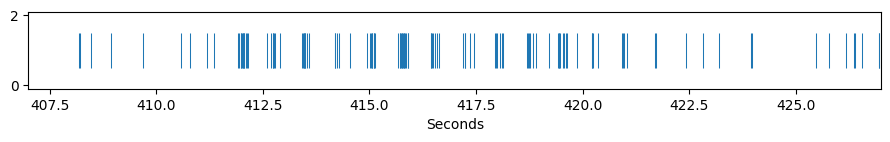

In [31]:
# Make raster for shorter segment of time
raster_start_time = 407
raster_end_time = 427

plt.figure(figsize=(11,1))
plt.eventplot(example_unit_spike_times,linewidth=0.75)
plt.xlim(raster_start_time,raster_end_time)
plt.xlabel('Seconds');

## 5. "Stimulus" table

In [32]:
stim_table = session.stimulus_presentations

In [33]:
stim_table.head()

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,flashes_since_change,trials_id,rewarded,stimulus_name,position_y,temporal_frequency,is_sham_change,stimulus_index,active,spatial_frequency,orientation,color,position_x,contrast
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,im104_r,0.250212,25.254420,25.504632,60,75,False,True,False,0,0,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN
1,0,im104_r,0.250212,26.005057,26.255269,105,120,False,True,False,1,0,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN
2,0,im104_r,0.250208,26.755685,27.005892,150,165,False,True,False,2,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN
3,0,im104_r,0.250207,27.506307,27.756515,195,210,False,True,False,3,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN
4,0,im104_r,0.250213,28.256929,28.507142,240,255,False,True,False,4,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN


In [34]:
# How many stimulus presentations in session?
len(stim_table)

13405

In [35]:
# Select stimuli presented during time period in raster plot
stim_times = stim_table[(stim_table.start_time>raster_start_time) & (stim_table.start_time<raster_end_time)]
stim_times.head()

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,flashes_since_change,trials_id,rewarded,stimulus_name,position_y,temporal_frequency,is_sham_change,stimulus_index,active,spatial_frequency,orientation,color,position_x,contrast
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,,,,
509,0,im083_r,0.250204,407.357158,407.607362,22967,22982,False,False,False,6,84,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN
510,0,im083_r,0.250215,408.107791,408.358006,23012,23027,False,False,False,7,84,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN
511,0,im083_r,0.250203,408.858422,409.108625,23057,23072,False,False,False,8,84,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN
512,0,im083_r,0.250217,409.609033,409.859250,23102,23117,False,False,False,9,84,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN
513,0,im083_r,0.250215,410.359684,410.609899,23147,23162,False,False,False,10,84,False,Natural_Images_Lum_Matched_set_ophys_H_2019,NaN,NaN,False,-99,True,NaN,NaN,NaN,NaN,NaN


## Plot stimulus presentations with raster plot

In [36]:
# What are the unique stimulus image names
unique_stim = stim_times.image_name.unique()
print(unique_stim)

['im083_r' 'im034_r' 'im104_r' 'omitted']


In [37]:
# Map color to each image
colors = ['blue','green','purple','gray']
color_stim_dict = dict(zip(unique_stim,colors))
color_stim_dict

{'im083_r': 'blue', 'im034_r': 'green', 'im104_r': 'purple', 'omitted': 'gray'}

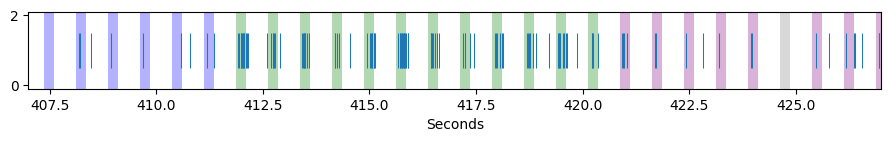

In [38]:
plt.figure(figsize=(11,1))
plt.eventplot(example_unit_spike_times,linewidth=0.75)

plt.xlim(raster_start_time,raster_end_time)
plt.xlabel('Seconds');

for row in stim_times.iterrows():
    t_start = row[1].start_time
    plt.axvspan(t_start,t_start+0.25,alpha=0.3,color=color_stim_dict[row[1].image_name],lw=0)

## 6. Behavioral "Trials" table

In [39]:
trials = session.trials
trials.head()

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
trials_id,,,,,,,,,,,,,,,,,,,,
0,25.20983,26.19343,im104_r,im104_r,False,NaN,False,False,"[25.72637, 25.87602]",NaN,NaN,0.0,False,False,False,False,True,False,-99,0.98360
1,26.71046,28.34528,im104_r,im104_r,False,NaN,False,False,[28.02817],NaN,NaN,0.0,False,False,False,False,True,False,-99,1.63482
2,28.96234,32.73245,im104_r,im104_r,False,NaN,False,False,[32.39844],NaN,NaN,0.0,False,False,False,False,True,False,-99,3.77011
3,33.46618,35.85175,im104_r,im104_r,False,NaN,False,False,[35.53463],NaN,NaN,0.0,False,False,False,False,True,False,-99,2.38557
4,36.46863,39.62138,im104_r,im104_r,False,NaN,False,False,"[39.15441, 39.28716]",NaN,NaN,0.0,False,False,False,False,True,False,-99,3.15275


## Plot behavior trial data on raster plot

In [40]:
# Filter trials that occur during time window in our raster plot above
trials_for_plot = trials[(trials.start_time>raster_start_time) & (trials.start_time<raster_end_time)]
trials_for_plot

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
trials_id,,,,,,,,,,,,,,,,,,,,
84,407.31176,416.08604,im083_r,im034_r,True,411.81641,True,False,"[412.35003, 412.56598, 412.666, 412.78304, 412...",412.35003,412.35003,0.003,True,False,False,False,False,False,23237,8.77428
85,416.31925,425.09369,im034_r,im104_r,True,420.82354,True,False,"[421.35757, 421.45691, 421.55675, 421.65716, 4...",421.35757,421.35757,0.003,True,False,False,False,False,False,23777,8.77444
86,425.32698,427.81279,im104_r,im104_r,False,NaN,False,False,[427.49546],NaN,NaN,0.000,False,False,False,False,True,False,-99,2.48581


In [41]:
# Get lick times
lick_times = trials_for_plot.lick_times.values
lick_times = np.concatenate(lick_times) # Flatten array of arrays to 1D array
lick_times

array([412.35003, 412.56598, 412.666  , 412.78304, 412.89946, 413.01629,
       413.13308, 413.26647, 413.39998, 413.51672, 413.65019, 413.96706,
       421.35757, 421.45691, 421.55675, 421.65716, 421.75695, 421.87374,
       421.99047, 422.10716, 422.2406 , 422.37416, 422.50751, 422.62421,
       422.75773, 422.87475, 423.09138, 427.49546])

In [42]:
# Get reward times
reward_times = trials_for_plot.reward_time.values
reward_times

array([412.35003, 421.35757,       nan])

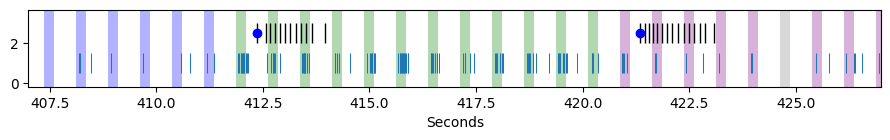

In [43]:
plt.figure(figsize=(11,1))

# Plot spike train
plt.eventplot(example_unit_spike_times,linewidth=0.75)

# Plot stimulus times
for row in stim_times.iterrows():
    t_start = row[1].start_time
    plt.axvspan(t_start,t_start+0.25,alpha=0.3,color=color_stim_dict[row[1].image_name],lw=0)

# Plot lick and reward times
plt.eventplot(lick_times,lineoffsets=2.5,color='black',linewidth=1)
plt.plot(reward_times,np.ones_like(reward_times)*2.5,color='blue',marker='o',linestyle='');

# Formatting
plt.xlim(raster_start_time,raster_end_time)
plt.xlabel('Seconds');

***Homework 1***

